In [1]:
import cv2
import numpy as np
import pandas as pd
import os 
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from imutils import face_utils

In [2]:
basePath= os.path.dirname(os.getcwd())


In [3]:
cascPath = basePath+"/haarcascade/haarcascade_frontalface_default.xml"
eyePath = basePath + "/haarcascade/haarcascade_eye.xml"
smilePath = basePath +"/haarcascade/haarcascade_smile.xml"
imagesPath = basePath+"/faces/"

In [4]:
faceCascade = cv2.CascadeClassifier(cascPath)
eyeCascade = cv2.CascadeClassifier(eyePath)
smileCascade= cv2.CascadeClassifier(smilePath)

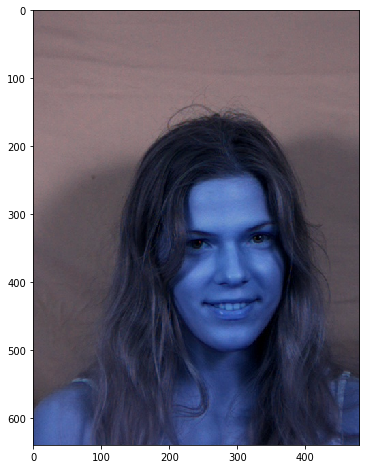

In [5]:
#Detect face of an image ,lets read only 1st image
gray = cv2.imread(imagesPath+"/i000qa-fn.jpg")
plt.figure(figsize =(12,8))
plt.imshow(gray,cmap='gray')

In [6]:
#detect the face and we add rectangle around it 
faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,flags=cv2.CASCADE_SCALE_IMAGE)
for (x,y,w,h) in faces:
    #Draw the rectangle around the face
    cv2.rectangle(gray,(x,y),(x+w,y+h),(255,255,255),3)

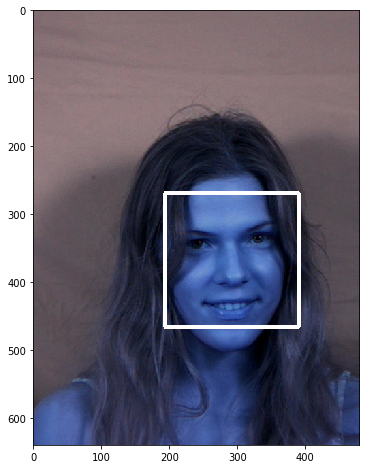

In [7]:
plt.figure(figsize =(12,8))
plt.imshow(gray,cmap='gray')
plt.show()

In [8]:
#function to detect face using OpenCV
def detect_face(img):
    #convert the test image to gray scale as opencv face detector expects gray images
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GCOLOR_BGR2GRAYRAY) # this is not needed as img is already COLOR_BGR2GRAY
 
    #load OpenCV face detector, Haar Classifier more accurate but slow: Haar classifier
    faceCascade = cv2.CascadeClassifier(cascPath)

 
    #let's detect multiscale images(some images may be closer to camera than others)
    #result is a list of faces
    faces = faceCascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5);
 
    #if no faces are detected then return original img
    if (len(faces) == 0):
        return None, None
 
    #under the assumption that there will be only one face,
    #extract the face area
    (x, y, w, h) = faces[0]
 
    #return only the face part of the image
    return img[y:y+w, x:x+h], faces[0]

In [9]:
# read all images one by one 
import re
def prepare_data_converting_gray(data_path):
    #list to hold all faces 
    faces =[]
    print(data_path)
    #list to hold all labels as well as all faces 
    face_labels =[]
    dirs = os.listdir(data_path)
    for i in dirs:
        print("processing",data_path +i)
        #reading all images 
        extractLabel = (re.split("-",i)[-1]).split(".",1)[0]
        if(extractLabel.startswith('m')):
            label="male"
        else:
            label="female"
        print ("Holding all face labesl with count:"+str(len(face_labels)))
        imag = cv2.imread(data_path +i,0) # 0 converts to gray
        #dispaly an image window to show the image 
        cv2.imshow("Training on image...",imag)
        cv2.waitKey(100)
      
        #detect face
        face,rect = detect_face(imag)
        
        #ignore the face that are not detected 
        if face is not None:
            #add face to faces list
            faces.append(face)
            #add label for this face
            face_labels.append(label)
            
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
        
    return faces,face_labels

In [10]:
# first pass all the data to prepare_data_converting_gray function so that we can then 
# split them into train and test 

print("Converting all data to gray scale")
allFaces,allLabels = prepare_data_converting_gray(imagesPath)

print("Data Prepared")
print("Total faces:" , len(allFaces))
print("Total labels:", len(allLabels))

Converting all data to gray scale
/Users/pbishwal/Documents/Techie/BITS/SEM2/Assignments/ML/Assignment8/faces/
processing /Users/pbishwal/Documents/Techie/BITS/SEM2/Assignments/ML/Assignment8/faces/i073qa-mg.jpg
Holding all face labesl with count:0
processing /Users/pbishwal/Documents/Techie/BITS/SEM2/Assignments/ML/Assignment8/faces/i066ra-mn.jpg
Holding all face labesl with count:1
processing /Users/pbishwal/Documents/Techie/BITS/SEM2/Assignments/ML/Assignment8/faces/i218ua-fn.jpg
Holding all face labesl with count:2
processing /Users/pbishwal/Documents/Techie/BITS/SEM2/Assignments/ML/Assignment8/faces/i035qa-mn.jpg
Holding all face labesl with count:3
processing /Users/pbishwal/Documents/Techie/BITS/SEM2/Assignments/ML/Assignment8/faces/i304va-fg.jpg
Holding all face labesl with count:4
processing /Users/pbishwal/Documents/Techie/BITS/SEM2/Assignments/ML/Assignment8/faces/i305va-fg.jpg
Holding all face labesl with count:5
processing /Users/pbishwal/Documents/Techie/BITS/SEM2/Assignm

In [11]:
#Lets do a train test split 
#allFaces is a list containing matrices 
from sklearn.model_selection import train_test_split
face_train, face_test, label_train, label_test = train_test_split(allFaces, allLabels, test_size=0.32, random_state=42)

print("Total train images",len(face_train),len(label_train))
print("Total test images",len(face_test),len(label_test))

Total train images 508 508
Total test images 240 240


In [66]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model_GNB = GaussianNB()
# Train the model using the training sets
for i in range(len(face_train)):
    all_labels =np.array(label_train[i])
    model_GNB.fit( (face_train[i][:200,:200]).reshape(1,-1), all_labels.reshape(1,-1))

#If your X.shape is (m, n), your y.shape should be (m)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [70]:
predicted=[]
for i in range(len(face_test)):
    predicted.append(model_GNB.predict( (face_test[i][:200,:200]).reshape(1,-1)))
    print ("Predicted Value:", predicted)


/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packag

Predicted Value: [array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], 

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packag


Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packag

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packag

Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype=

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packag

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packag

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packag

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packag

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packag

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packag

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packag

Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype=

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packag

In [125]:
count_f=0
count_m=0
for i in range(len(predicted)):
    if(predicted[i]=='male'):
        count_m=count_m+1
    else:
        count_f=count_f+1
print(count_m,count_f)

240 0


In [126]:
count_f=0
count_m=0
for i in range(len(label_test)):
    if(label_train[i]=='male'):
        count_m=count_m+1
    else:
        count_f=count_f+1
print(count_m,count_f)

126 114


In [19]:
face_train[1][200].reshape(1,-1).shape

(1, 66564)

In [58]:
(face_test[80][:200,:200]) .reshape(-1,1).shape

(40000, 1)

In [80]:
face_train[20].shape,face_test[20].shape

((269, 269), (252, 252))

In [81]:
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
from scipy.linalg import svd


In [100]:

svd = TruncatedSVD(n_components=200)
svd.fit(face_train[300])
result = svd.transform(face_train[300])
print(result.shape)

(234, 200)


In [105]:
from sklearn.decomposition import TruncatedSVD
reduced_face_train=[]
for i in range(len(face_train)):
    svd = TruncatedSVD(n_components=60)
    svd.fit(face_train[i])
    reduced_face_train.append( svd.transform(face_train[i]) )
    

In [112]:
from sklearn.decomposition import TruncatedSVD
reduced_face_test=[]
for i in range(len(face_test)):
    svd = TruncatedSVD(n_components=60)
    svd.fit(face_test[i])
    reduced_face_test.append( svd.transform(face_test[i]) )
    

In [111]:
reduced_face_train[10].reshape(-1,1).shape

(13980, 1)

In [123]:
for i in range(len(reduced_face_train)):
    all_labels =np.array(label_train[i])
    model_GNB.fit( (reduced_face_train[i][:200,:200]).reshape(1,-1), all_labels.reshape(1,-1))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [124]:
predicted=[]
for i in range(len(reduced_face_test)):
    predicted.append(model_GNB.predict( (reduced_face_test[i][:200,:200]).reshape(1,-1)))
    print ("Predicted Value:", predicted)



/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/skl

Predicted Value: [array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4')]
Predicted Value: [array(['male'], 

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/skl

Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype=

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/skl

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/skl

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/skl

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/skl

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/skl

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/skl

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/skl

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/skl

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/skl

[array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['m

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/skl

Predicted Value: [array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype='<U4'), array(['male'], dtype=

/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: divide by zero encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in subtract
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/site-packages/skl